# 1、项目背景

本项目是一个关于互联网电影的数据分析，数据来源于互联网电影资料库（IMDb）,资料中包括了影片的信息、演员、片长、内容介绍、分级、评论等。 
数据源：movie_metadata.csv 
字段解释： 
电影描述字段：movie_title 电影题目 
          language 语言
          country 国家 
          content_rating 电影分级
          #title_year 电影年份
          color 色彩
          duration 片长
          genres 电影体裁/类型 
          plot_keywords 剧情关键字

电影制作字段：budget 制作成本 
          gross 总收入
          aspect_ratio 画布比例

电影阵容字段：facenumber_in_poster 
         海报中的人脸数量
         director_name 导演 
         director_facebook_likes 导演facebook粉丝数 
         actor_1_name 主演1姓名
         actor_1_facebook_likes 主演1facebook粉丝数
         actor_2_name 主演2姓名
         actor_2_facebook_likes 主演2facebook粉丝数 
         actor_3_name 主演3姓名 
         actor_3_facebook_likes 主演3facebook粉丝数

电影评论字段：num_voted_users 投票人数
          num_user_for_reviews 用户的评论数量
          num_critic_for_reviews 评论家评论数 
          movie_facebook_likes 脸书上被点赞的数量 
          cast_total_facebook_likes Facebook上偷喜爱的总数 
          movie_imdb_link 电影数据链接 
          imdb_score imdb上的评分

本分析过程主要如下： 数据读取、数据清洗、数据分析

# 2、读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('movie_metadata.csv')
df

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,...,12.0,NaN,NaN,8,NaN,NaN,0,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,English,Canada,NaN,2013-06,Color,87.0,Comedy|Drama,fraud|postal worker|prison|theft|trial,NaN,...,470.0,Crystal Lowe,318.0,629,6.0,1.0,84,2283,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,7.7
5039,The Following,English,USA,TV-14,NaN,Color,43.0,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,NaN,...,593.0,Sam Underwood,319.0,73839,359.0,43.0,32000,1753,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,7.5
5040,A Plague So Pleasant,English,USA,NaN,2013-09,Color,76.0,Drama|Horror|Thriller,NaN,1400.0,...,0.0,David Chandler,0.0,38,3.0,13.0,16,0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,6.3
5041,Shanghai Calling,English,USA,PG-13,2012-11,Color,100.0,Comedy|Drama|Romance,NaN,NaN,...,719.0,Eliza Coupe,489.0,1255,9.0,14.0,660,2386,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,6.3


# 3、数据清洗
3.1浏览大概数据

In [3]:
#查看行列数量
df.shape

(5043, 28)

In [4]:
#查看各个列的非空数据量
df.count()

movie_title                  5043
language                     5031
country                      5038
content_rating               4740
title_year                   4935
color                        5024
duration                     5028
genres                       5043
plot_keywords                4890
budget                       4551
gross                        4159
aspect_ratio                 4714
facenumber_in_poster         5043
director_name                4939
director_facebook_likes      4939
actor_1_name                 5036
actor_1_facebook_likes       5036
actor_2_name                 5030
actor_2_facebook_likes       5030
actor_3_name                 5020
actor_3_facebook_likes       5020
num_voted_users              5043
num_user_for_reviews         5022
num_critic_for_reviews       4993
movie_facebook_likes         5043
cast_total_facebook_likes    5043
movie_imdb_link              5043
imdb_score                   5043
dtype: int64

In [5]:
#NAN统计
df.isna().sum()

movie_title                    0
language                      12
country                        5
content_rating               303
title_year                   108
color                         19
duration                      15
genres                         0
plot_keywords                153
budget                       492
gross                        884
aspect_ratio                 329
facenumber_in_poster           0
director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
num_voted_users                0
num_user_for_reviews          21
num_critic_for_reviews        50
movie_facebook_likes           0
cast_total_facebook_likes      0
movie_imdb_link                0
imdb_score                     0
dtype: int64

In [6]:
#数据整体描述
df.describe()

,duration,budget,gross,aspect_ratio,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score
count,5028.000000,4.551000e+03,4.159000e+03,4714.000000,5043.000000,4939.000000,5036.000000,5030.000000,5020.000000,5.043000e+03,5022.000000,4993.000000,5043.000000,5043.000000,5043.000000
mean,107.201074,3.975262e+07,4.846841e+07,2.220403,1.367638,686.509212,6560.047061,1651.754473,645.009761,8.366816e+04,272.770808,140.194272,7525.964505,9699.063851,6.442138
std,25.197441,2.061149e+08,6.845299e+07,1.385113,2.012180,2813.328607,15020.759120,4042.438863,1665.041728,1.384853e+05,377.982886,121.601675,19320.445110,18163.799124,1.125116
min,7.000000,2.180000e+02,1.620000e+02,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,0.000000,0.000000,1.600000
25%,93.000000,6.000000e+06,5.340988e+06,1.850000,0.000000,7.000000,614.000000,281.000000,133.000000,8.593500e+03,65.000000,50.000000,0.000000,1411.000000,5.800000
50%,103.000000,2.000000e+07,2.551750e+07,2.350000,1.000000,49.000000,988.000000,595.000000,371.500000,3.435900e+04,156.000000,110.000000,166.000000,3090.000000,6.600000
75%,118.000000,4.500000e+07,6.230944e+07,2.350000,2.000000,194.500000,11000.000000,918.000000,636.000000,9.630900e+04,326.000000,195.000000,3000.000000,13756.500000,7.200000
max,511.000000,1.221550e+10,7.605058e+08,16.000000,43.000000,23000.000000,640000.000000,137000.000000,23000.000000,1.689764e+06,5060.000000,813.000000,349000.000000,656730.000000,9.500000


In [7]:
#数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   language                   5031 non-null   object 
 2   country                    5038 non-null   object 
 3   content_rating             4740 non-null   object 
 4   title_year                 4935 non-null   object 
 5   color                      5024 non-null   object 
 6   duration                   5028 non-null   float64
 7   genres                     5043 non-null   object 
 8   plot_keywords              4890 non-null   object 
 9   budget                     4551 non-null   float64
 10  gross                      4159 non-null   float64
 11  aspect_ratio               4714 non-null   float64
 12  facenumber_in_poster       5043 non-null   int64  
 13  director_name              4939 non-null   objec

In [8]:
#简单浏览下数据
df.head()

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,...,12.0,NaN,NaN,8,NaN,NaN,0,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,7.1


3.2数据清洗

In [9]:
data=df.dropna(how='any')
data

,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,936.0,Wes Studi,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,5000.0,Jack Davenport,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,393.0,Stephanie Sigman,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,Joseph Gordon-Levitt,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5
5,John Carter,English,USA,PG-13,2012-07,Color,132.0,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,263700000.0,...,632.0,Polly Walker,530.0,212204,738.0,462.0,24000,1873,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Clean,French,France,R,2004-01,Color,110.0,Drama|Music|Romance,jail|junkie|money|motel|singer,4500.0,...,133.0,Don McKellar,45.0,3924,39.0,81.0,171,776,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,6.9
5027,The Circle,Persian,Iran,Not Rated,2000-05,Color,90.0,Drama,abortion|bus|hospital|prison|prostitution,10000.0,...,0.0,Mojgan Faramarzi,0.0,4555,26.0,64.0,697,5,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,7.5
5033,Primer,English,USA,PG-13,2004-10,Color,77.0,Drama|Sci-Fi|Thriller,changing the future|independent film|invention...,7000.0,...,45.0,Casey Gooden,8.0,72639,371.0,143.0,19000,368,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,7.0
5035,El Mariachi,Spanish,USA,R,1992-03,Color,81.0,Action|Crime|Drama|Romance|Thriller,assassin|death|guitar|gun|mariachi,7000.0,...,20.0,Consuelo Gómez,6.0,52055,130.0,56.0,0,147,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,6.9


# 4、数据分析
4.1电影发展趋势

In [10]:
#历年来电影数量
data['year']=data['title_year'].apply(lambda x:x[:4])
data['month']=data['title_year'].apply(lambda x:x[5:])
data

C:\Users\19152\AppData\Local\Temp/ipykernel_14664/914329612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['title_year'].apply(lambda x:x[:4])
C:\Users\19152\AppData\Local\Temp/ipykernel_14664/914329612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']=data['title_year'].apply(lambda x:x[5:])


,movie_title,language,country,content_rating,title_year,color,duration,genres,plot_keywords,budget,...,actor_3_facebook_likes,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,cast_total_facebook_likes,movie_imdb_link,imdb_score,year,month
0,Avatar,English,USA,PG-13,2009-02,Color,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,...,855.0,886204,3054.0,723.0,33000,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.9,2009,02
1,Pirates of the Caribbean: At World's End,English,USA,PG-13,2007-09,Color,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,...,1000.0,471220,1238.0,302.0,0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,2007,09
2,Spectre,English,UK,PG-13,2015-11,Color,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,...,161.0,275868,994.0,602.0,85000,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,2015,11
3,The Dark Knight Rises,English,USA,PG-13,2012-08,Color,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,...,23000.0,1144337,2701.0,813.0,164000,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.5,2012,08
5,John Carter,English,USA,PG-13,2012-07,Color,132.0,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,263700000.0,...,530.0,212204,738.0,462.0,24000,1873,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,6.6,2012,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Clean,French,France,R,2004-01,Color,110.0,Drama|Music|Romance,jail|junkie|money|motel|singer,4500.0,...,45.0,3924,39.0,81.0,171,776,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,6.9,2004,01
5027,The Circle,Persian,Iran,Not Rated,2000-05,Color,90.0,Drama,abortion|bus|hospital|prison|prostitution,10000.0,...,0.0,4555,26.0,64.0,697,5,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,7.5,2000,05
5033,Primer,English,USA,PG-13,2004-10,Color,77.0,Drama|Sci-Fi|Thriller,changing the future|independent film|invention...,7000.0,...,8.0,72639,371.0,143.0,19000,368,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,7.0,2004,10
5035,El Mariachi,Spanish,USA,R,1992-03,Color,81.0,Action|Crime|Drama|Romance|Thriller,assassin|death|guitar|gun|mariachi,7000.0,...,6.0,52055,130.0,56.0,0,147,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,6.9,1992,03


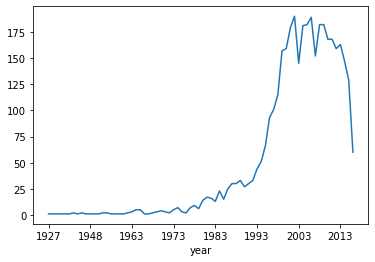

In [14]:
#历年来电影数量
#根据年份分组，统计每年上映电影个数
movie_years_count=data.groupby('year')['movie_title'].count()
plt.figure()
movie_years_count.plot()
plt.savefig('movie_years_count.png')
plt.show()

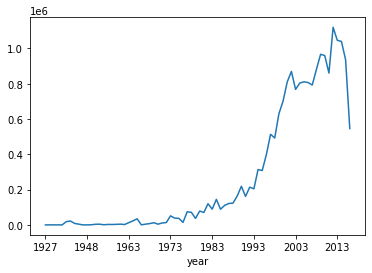

In [15]:
#历年来电影票房走势
movie_years_gross=data.groupby('year')['gross'].sum()/10000
plt.figure()
movie_years_gross.plot()
plt.savefig('movie_years_gross.png')
plt.show()

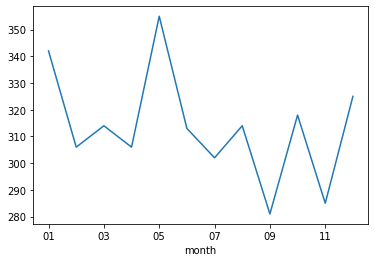

In [16]:
#月份电影数量走势
movie_month_count = data.groupby('month')['movie_title'].count()
plt.figure()
movie_month_count.plot()
plt.savefig('movie_month_count.png')
plt.show()

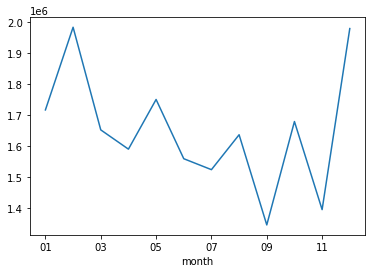

In [17]:
#月份电影票房走势
movie_month_gross=data.groupby('month')['gross'].sum()/10000
plt.figure()
movie_month_gross.plot()
plt.savefig('movie_month_gross.png')
plt.show()

In [18]:
#各国家电影数量
country_years_count=data.groupby('country')['movie_title'].count()
country_years_count

country
Afghanistan          1
Argentina            3
Aruba                1
Australia           39
Belgium              1
Brazil               5
Canada              59
Chile                1
China               13
Colombia             1
Czech Republic       3
Denmark              8
Finland              1
France             101
Georgia              1
Germany             80
Greece               1
Hong Kong           13
Hungary              2
Iceland              1
India                5
Indonesia            1
Iran                 4
Ireland              7
Israel               1
Italy               11
Japan               15
Mexico               6
Netherlands          3
New Line             1
New Zealand         11
Norway               4
Official site        1
Peru                 1
Poland               1
Romania              2
Russia               3
South Africa         3
South Korea          8
Spain               21
Taiwan               2
Thailand             4
UK                 318
USA

4.2电影情况分析

In [19]:
#电影时长分布
movie_duration=data.duration
movie_duration

0       178.0
1       169.0
2       148.0
3       164.0
5       132.0
        ...  
5026    110.0
5027     90.0
5033     77.0
5035     81.0
5042     90.0
Name: duration, Length: 3761, dtype: float64

37
330


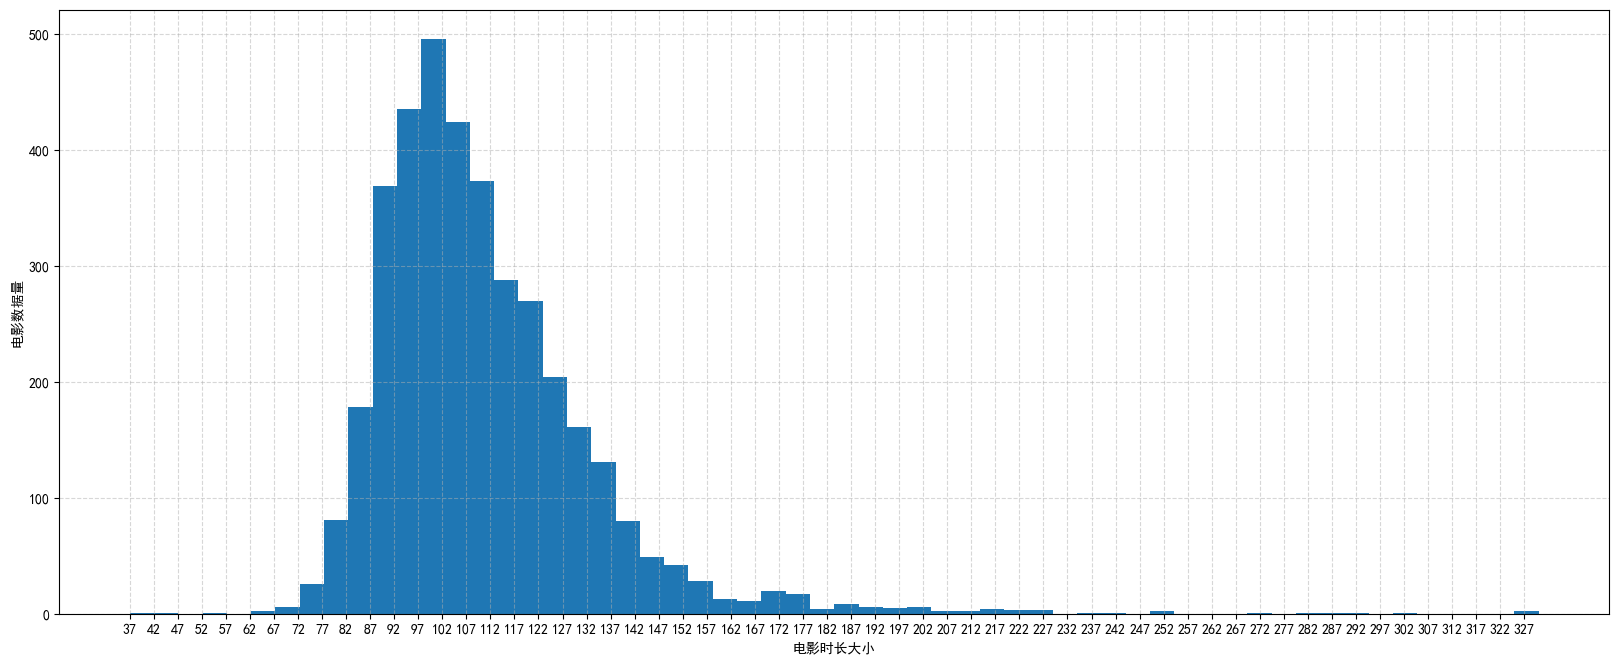

In [23]:
#创建画布
plt.figure(figsize=(20,8),dpi=100)
plt.rcParams['font.sans-serif']=['SimHei']

#绘制直方图
#设置组距
distance=5

#计算组数
group_num=int((max(movie_duration)-min(movie_duration))/distance)

#绘制直方图
#time X轴坐标，bins：组值或者标签
plt.hist(movie_duration,bins=group_num)

print(int(min(movie_duration)))
print(int(max(movie_duration)))

#修改x轴刻度显示
plt.xticks(range(int(min(movie_duration)),int(max(movie_duration)))[::5])

#添加网格显示
plt.grid(linestyle="--",alpha=0.5) #alpha为透明度

#添加x,y轴描述信息
plt.xlabel("电影时长大小")
plt.ylabel("电影数据量")

#显示图像
plt.show()

 电影类型分析
 
 
 源数据中，每个电影对应好几种题材，需要先将数据处理为一个电影对应一个题材

In [25]:
#构建新的dataframe,只需要类别和票房两个特征
genre_data = pd.DataFrame(columns=['genre','gross'])

#data.iterrows:使用迭代器的方式读取数据，返回数字索引(int)和每一行的数据(series)
for i,row_data in data.iterrows():
    #使用split将genres分割
    genres = row_data['genres'].split('|')
    n_genres=len(genres)
    #构建一个空字典，用来保存genre和gross的值
    dict_obj={}
    dict_obj['gross']=[row_data['gross']]*n_genres
    print(dict_obj['gross'])
    
    dict_obj['genre']=genres
    
    #将字典转为dataframe类型
    genre_df=pd.DataFrame(dict_obj)
    #DataFrame的append将genre_df的数据添加进genre_data
    genre_data = genre_data.append(genre_df)

#将最终的数据写入csv保存
genre_data.to_csv('genre_data.csv',index=None)

[760505847.0, 760505847.0, 760505847.0, 760505847.0]
[309404152.0, 309404152.0, 309404152.0]
[200074175.0, 200074175.0, 200074175.0]
[448130642.0, 448130642.0]
[73058679.0, 73058679.0, 73058679.0]
[336530303.0, 336530303.0, 336530303.0]
[200807262.0, 200807262.0, 200807262.0, 200807262.0, 200807262.0, 200807262.0, 200807262.0]
[458991599.0, 458991599.0, 458991599.0]
[301956980.0, 301956980.0, 301956980.0, 301956980.0]
[330249062.0, 330249062.0, 330249062.0]
[200069408.0, 200069408.0, 200069408.0]
[168368427.0, 168368427.0]
[423032628.0, 423032628.0, 423032628.0]
[89289910.0, 89289910.0, 89289910.0]
[291021565.0, 291021565.0, 291021565.0, 291021565.0]
[141614023.0, 141614023.0, 141614023.0, 141614023.0]
[623279547.0, 623279547.0, 623279547.0]
[241063875.0, 241063875.0, 241063875.0]
[179020854.0, 179020854.0, 179020854.0, 179020854.0, 179020854.0, 179020854.0]
[255108370.0, 255108370.0]
[262030663.0, 262030663.0, 262030663.0]
[105219735.0, 105219735.0, 105219735.0, 105219735.0]
[25835535

[6712451.0, 6712451.0]
[101643008.0, 101643008.0, 101643008.0]
[187670866.0, 187670866.0, 187670866.0]
[132014112.0, 132014112.0, 132014112.0, 132014112.0]
[261970615.0, 261970615.0, 261970615.0, 261970615.0]
[167007184.0, 167007184.0, 167007184.0]
[180011740.0, 180011740.0, 180011740.0, 180011740.0]
[204843350.0, 204843350.0]
[97030725.0, 97030725.0, 97030725.0, 97030725.0, 97030725.0]
[130127620.0, 130127620.0, 130127620.0]
[146282411.0, 146282411.0, 146282411.0]
[65452312.0, 65452312.0, 65452312.0]
[148383780.0, 148383780.0]
[119219978.0, 119219978.0, 119219978.0]
[101228120.0, 101228120.0, 101228120.0, 101228120.0]
[162804648.0, 162804648.0]
[100117603.0, 100117603.0, 100117603.0, 100117603.0, 100117603.0]
[89296573.0, 89296573.0, 89296573.0, 89296573.0, 89296573.0]
[85017401.0, 85017401.0, 85017401.0]
[173005002.0, 173005002.0, 173005002.0, 173005002.0, 173005002.0]
[75030163.0, 75030163.0, 75030163.0, 75030163.0]
[77222184.0, 77222184.0, 77222184.0, 77222184.0]
[34964818.0, 34964

[47456450.0, 47456450.0, 47456450.0]
[148213377.0, 148213377.0, 148213377.0]
[112950721.0, 112950721.0, 112950721.0]
[75600000.0, 75600000.0, 75600000.0, 75600000.0]
[62647540.0, 62647540.0, 62647540.0]
[183132370.0, 183132370.0, 183132370.0]
[27796042.0, 27796042.0]
[32616869.0, 32616869.0, 32616869.0]
[18947630.0, 18947630.0, 18947630.0]
[114195633.0, 114195633.0, 114195633.0, 114195633.0]
[144156464.0, 144156464.0, 144156464.0]
[227965690.0, 227965690.0, 227965690.0]
[436471036.0, 436471036.0, 436471036.0, 436471036.0, 436471036.0, 436471036.0]
[244052771.0, 244052771.0, 244052771.0, 244052771.0, 244052771.0]
[152149590.0, 152149590.0]
[141204016.0, 141204016.0, 141204016.0]
[162495848.0, 162495848.0, 162495848.0, 162495848.0, 162495848.0]
[136448821.0, 136448821.0]
[120523073.0, 120523073.0, 120523073.0]
[119654900.0, 119654900.0, 119654900.0, 119654900.0]
[72660029.0, 72660029.0]
[117541000.0, 117541000.0]
[116643346.0, 116643346.0, 116643346.0, 116643346.0]
[100614858.0, 10061485

[104354205.0, 104354205.0]
[107100855.0, 107100855.0, 107100855.0]
[98711404.0, 98711404.0, 98711404.0, 98711404.0]
[100328194.0, 100328194.0, 100328194.0]
[101530738.0, 101530738.0, 101530738.0]
[93815117.0, 93815117.0, 93815117.0]
[91400000.0, 91400000.0, 91400000.0, 91400000.0]
[162586036.0, 162586036.0]
[89706988.0, 89706988.0, 89706988.0]
[83000000.0, 83000000.0]
[78745923.0, 78745923.0, 78745923.0]
[70098138.0]
[66365290.0]
[66207920.0, 66207920.0, 66207920.0, 66207920.0]
[63408614.0, 63408614.0, 63408614.0, 63408614.0]
[58422650.0, 58422650.0, 58422650.0]
[56932305.0, 56932305.0, 56932305.0, 56932305.0]
[68750000.0, 68750000.0, 68750000.0]
[68218041.0, 68218041.0, 68218041.0]
[25040293.0, 25040293.0, 25040293.0]
[55747724.0, 55747724.0, 55747724.0, 55747724.0]
[55473600.0, 55473600.0, 55473600.0]
[49994804.0, 49994804.0, 49994804.0, 49994804.0]
[41609593.0, 41609593.0, 41609593.0, 41609593.0]
[38553833.0, 38553833.0, 38553833.0, 38553833.0]
[76137505.0, 76137505.0, 76137505.0, 7

[181395380.0, 181395380.0, 181395380.0]
[130512915.0, 130512915.0, 130512915.0]
[139852971.0, 139852971.0, 139852971.0]
[110000082.0]
[106807667.0, 106807667.0, 106807667.0, 106807667.0]
[101702060.0, 101702060.0, 101702060.0, 101702060.0, 101702060.0]
[95149435.0, 95149435.0, 95149435.0]
[100768056.0, 100768056.0, 100768056.0, 100768056.0]
[92115211.0, 92115211.0, 92115211.0, 92115211.0]
[93452056.0, 93452056.0, 93452056.0]
[83287363.0, 83287363.0]
[82931301.0, 82931301.0]
[60962878.0, 60962878.0, 60962878.0, 60962878.0]
[76261036.0, 76261036.0, 76261036.0]
[71423726.0, 71423726.0, 71423726.0]
[71277420.0]
[88625922.0, 88625922.0, 88625922.0, 88625922.0]
[70001065.0, 70001065.0]
[67253092.0, 67253092.0]
[66790248.0, 66790248.0]
[65557989.0, 65557989.0, 65557989.0, 65557989.0]
[60786269.0, 60786269.0, 60786269.0, 60786269.0]
[59365105.0, 59365105.0, 59365105.0]
[162792677.0, 162792677.0, 162792677.0, 162792677.0, 162792677.0]
[31598308.0, 31598308.0, 31598308.0]
[57362581.0, 57362581.0

[46813366.0, 46813366.0]
[72279690.0, 72279690.0]
[191449475.0, 191449475.0, 191449475.0]
[71026631.0, 71026631.0, 71026631.0]
[68208190.0, 68208190.0, 68208190.0, 68208190.0]
[150368971.0, 150368971.0]
[50129186.0, 50129186.0, 50129186.0, 50129186.0, 50129186.0]
[55500000.0, 55500000.0, 55500000.0]
[50213619.0, 50213619.0]
[42019483.0, 42019483.0]
[23360779.0, 23360779.0, 23360779.0, 23360779.0, 23360779.0, 23360779.0, 23360779.0, 23360779.0]
[26183197.0, 26183197.0, 26183197.0, 26183197.0]
[20991497.0, 20991497.0, 20991497.0]
[13052741.0, 13052741.0]
[14378353.0, 14378353.0, 14378353.0, 14378353.0]
[33037754.0, 33037754.0, 33037754.0, 33037754.0]
[12339633.0, 12339633.0, 12339633.0]
[2954405.0, 2954405.0, 2954405.0]
[30105968.0, 30105968.0, 30105968.0, 30105968.0, 30105968.0]
[37788228.0]
[277313371.0]
[2126511.0, 2126511.0, 2126511.0, 2126511.0]
[205399422.0, 205399422.0, 205399422.0, 205399422.0]
[251188924.0, 251188924.0]
[1068392.0, 1068392.0, 1068392.0]
[144731527.0, 144731527.0

[58715510.0, 58715510.0]
[58156435.0, 58156435.0, 58156435.0]
[56044241.0, 56044241.0, 56044241.0]
[56816662.0, 56816662.0, 56816662.0]
[64238770.0, 64238770.0, 64238770.0, 64238770.0]
[52937130.0, 52937130.0, 52937130.0]
[52799004.0, 52799004.0]
[55210049.0, 55210049.0, 55210049.0, 55210049.0]
[51432423.0, 51432423.0, 51432423.0, 51432423.0]
[51109400.0, 51109400.0]
[50300000.0, 50300000.0, 50300000.0]
[56068547.0, 56068547.0, 56068547.0, 56068547.0, 56068547.0]
[53680848.0, 53680848.0]
[50921738.0, 50921738.0, 50921738.0, 50921738.0]
[53021560.0, 53021560.0, 53021560.0]
[45645204.0, 45645204.0, 45645204.0]
[53337608.0, 53337608.0, 53337608.0, 53337608.0, 53337608.0, 53337608.0]
[46875468.0, 46875468.0, 46875468.0, 46875468.0, 46875468.0]
[52418902.0, 52418902.0]
[42057340.0, 42057340.0]
[42478175.0, 42478175.0, 42478175.0]
[41407470.0, 41407470.0, 41407470.0]
[42385520.0, 42385520.0, 42385520.0]
[40118420.0, 40118420.0, 40118420.0]
[40137776.0, 40137776.0, 40137776.0, 40137776.0]
[39

[43984230.0, 43984230.0, 43984230.0]
[66489425.0, 66489425.0, 66489425.0, 66489425.0]
[41067398.0, 41067398.0, 41067398.0, 41067398.0]
[40218903.0]
[39880476.0, 39880476.0, 39880476.0, 39880476.0, 39880476.0]
[39399750.0, 39399750.0, 39399750.0, 39399750.0, 39399750.0, 39399750.0]
[38230435.0, 38230435.0]
[39008741.0, 39008741.0, 39008741.0, 39008741.0]
[36833473.0, 36833473.0, 36833473.0, 36833473.0]
[48237389.0, 48237389.0]
[36447959.0, 36447959.0, 36447959.0]
[45089048.0, 45089048.0, 45089048.0]
[35990505.0, 35990505.0, 35990505.0, 35990505.0]
[35143332.0]
[35000629.0, 35000629.0]
[34604054.0, 34604054.0, 34604054.0, 34604054.0]
[41597830.0, 41597830.0]
[33687630.0, 33687630.0]
[32553210.0, 32553210.0]
[31526393.0, 31526393.0, 31526393.0, 31526393.0]
[41229.0, 41229.0, 41229.0]
[31655091.0, 31655091.0]
[30012990.0, 30012990.0, 30012990.0]
[32368960.0, 32368960.0, 32368960.0, 32368960.0]
[14500000.0, 14500000.0, 14500000.0, 14500000.0]
[29247405.0, 29247405.0, 29247405.0]
[25615792.0

[42652003.0, 42652003.0]
[39737645.0, 39737645.0]
[37567440.0, 37567440.0]
[44988180.0, 44988180.0, 44988180.0, 44988180.0]
[39263506.0, 39263506.0, 39263506.0]
[39143839.0, 39143839.0]
[37672350.0, 37672350.0, 37672350.0]
[38037513.0, 38037513.0, 38037513.0, 38037513.0, 38037513.0]
[37442180.0, 37442180.0, 37442180.0, 37442180.0]
[35596227.0, 35596227.0, 35596227.0]
[35422828.0, 35422828.0, 35422828.0]
[36658108.0]
[34300771.0]
[34290142.0, 34290142.0]
[33422556.0, 33422556.0]
[32774834.0, 32774834.0]
[34334256.0, 34334256.0]
[32051917.0, 32051917.0, 32051917.0, 32051917.0]
[32014289.0]
[31838002.0, 31838002.0, 31838002.0]
[36874745.0, 36874745.0, 36874745.0, 36874745.0]
[30079316.0]
[35033759.0, 35033759.0]
[29753944.0, 29753944.0, 29753944.0, 29753944.0]
[31146570.0, 31146570.0]
[27277055.0, 27277055.0, 27277055.0, 27277055.0]
[26876529.0, 26876529.0]
[53146000.0, 53146000.0, 53146000.0]
[30028592.0, 30028592.0, 30028592.0, 30028592.0]
[34126138.0, 34126138.0, 34126138.0, 34126138.0

[96471845.0, 96471845.0, 96471845.0]
[85200000.0, 85200000.0, 85200000.0]
[72000000.0, 72000000.0, 72000000.0, 72000000.0]
[72219395.0, 72219395.0, 72219395.0]
[82389560.0]
[71502303.0, 71502303.0, 71502303.0, 71502303.0]
[19179969.0]
[47000000.0, 47000000.0]
[84961.0, 84961.0, 84961.0]
[37566230.0, 37566230.0, 37566230.0, 37566230.0, 37566230.0]
[70492685.0, 70492685.0]
[35635046.0, 35635046.0, 35635046.0, 35635046.0]
[45670855.0, 45670855.0]
[37939782.0, 37939782.0]
[172051787.0, 172051787.0, 172051787.0]
[30324946.0, 30324946.0, 30324946.0]
[27854896.0, 27854896.0, 27854896.0]
[41777564.0]
[22734486.0]
[44469602.0, 44469602.0, 44469602.0]
[64998368.0, 64998368.0, 64998368.0]
[19693891.0, 19693891.0, 19693891.0, 19693891.0]
[16311763.0, 16311763.0, 16311763.0]
[12693621.0, 12693621.0, 12693621.0]
[15655665.0, 15655665.0]
[11634458.0, 11634458.0, 11634458.0, 11634458.0, 11634458.0]
[27154426.0, 27154426.0, 27154426.0]
[54239856.0]
[8662318.0, 8662318.0]
[7156725.0, 7156725.0]
[1568102

[18004225.0, 18004225.0, 18004225.0]
[3058380.0, 3058380.0]
[3074838.0, 3074838.0, 3074838.0, 3074838.0]
[2104000.0, 2104000.0, 2104000.0]
[28501651.0, 28501651.0]
[1172769.0, 1172769.0, 1172769.0, 1172769.0]
[17738570.0, 17738570.0]
[1200000.0]
[1150403.0, 1150403.0, 1150403.0]
[403932.0, 403932.0, 403932.0]
[1712111.0, 1712111.0]
[1024175.0, 1024175.0, 1024175.0, 1024175.0]
[301305.0, 301305.0, 301305.0]
[51872378.0, 51872378.0]
[28399192.0, 28399192.0, 28399192.0, 28399192.0]
[2035566.0, 2035566.0, 2035566.0, 2035566.0, 2035566.0]
[21078145.0, 21078145.0]
[14060950.0]
[12281500.0, 12281500.0, 12281500.0, 12281500.0, 12281500.0]
[10725228.0, 10725228.0, 10725228.0]
[214966.0, 214966.0, 214966.0]
[11956207.0, 11956207.0]
[5949693.0, 5949693.0, 5949693.0]
[9030581.0, 9030581.0]
[4157491.0, 4157491.0, 4157491.0]
[1508689.0, 1508689.0]
[1227324.0, 1227324.0]
[4360548.0, 4360548.0, 4360548.0]
[26589953.0, 26589953.0, 26589953.0]
[1039869.0, 1039869.0, 1039869.0, 1039869.0]
[48092846.0, 48

[80000000.0, 80000000.0, 80000000.0]
[1997807.0, 1997807.0, 1997807.0]
[90800000.0, 90800000.0, 90800000.0, 90800000.0]
[140244.0, 140244.0, 140244.0]
[107930000.0, 107930000.0]
[32279955.0, 32279955.0, 32279955.0]
[4992159.0, 4992159.0, 4992159.0]
[163214286.0, 163214286.0, 163214286.0, 163214286.0, 163214286.0]
[69800000.0, 69800000.0, 69800000.0]
[59889948.0, 59889948.0]
[52287414.0, 52287414.0]
[45063889.0, 45063889.0, 45063889.0, 45063889.0]
[40066497.0, 40066497.0]
[36500000.0, 36500000.0, 36500000.0]
[27362712.0, 27362712.0, 27362712.0, 27362712.0]
[34746109.0, 34746109.0, 34746109.0, 34746109.0, 34746109.0]
[34963967.0, 34963967.0, 34963967.0]
[25926543.0, 25926543.0, 25926543.0]
[26049082.0, 26049082.0]
[22551000.0, 22551000.0, 22551000.0]
[22800000.0, 22800000.0, 22800000.0]
[18090181.0, 18090181.0, 18090181.0, 18090181.0]
[17843379.0, 17843379.0, 17843379.0]
[17278980.0, 17278980.0]
[16699684.0, 16699684.0]
[50815288.0, 50815288.0]
[15047419.0, 15047419.0]
[14015786.0, 14015

[3049135.0, 3049135.0, 3049135.0, 3049135.0, 3049135.0]
[4700361.0]
[2711210.0, 2711210.0]
[1980338.0, 1980338.0, 1980338.0, 1980338.0, 1980338.0]
[1082044.0, 1082044.0]
[1100000.0, 1100000.0]
[2445646.0, 2445646.0, 2445646.0, 2445646.0, 2445646.0]
[2221809.0]
[296665.0, 296665.0, 296665.0, 296665.0]
[3219029.0, 3219029.0, 3219029.0, 3219029.0]
[1040879.0, 1040879.0, 1040879.0]
[326308.0, 326308.0, 326308.0]
[124720.0, 124720.0]
[99147.0]
[65069140.0, 65069140.0]
[65087.0, 65087.0, 65087.0]
[16066.0, 16066.0, 16066.0]
[617228.0, 617228.0, 617228.0, 617228.0]
[24475416.0]
[47277326.0]
[1247453.0, 1247453.0]
[1729969.0, 1729969.0]
[1705139.0, 1705139.0, 1705139.0, 1705139.0]
[8025872.0, 8025872.0]
[778565.0, 778565.0]
[513836.0, 513836.0, 513836.0]
[434417.0]
[81200000.0]
[52700832.0, 52700832.0, 52700832.0]
[13060843.0]
[3798532.0, 3798532.0, 3798532.0, 3798532.0]
[3609278.0]
[1687311.0, 1687311.0]
[10429707.0]
[727883.0, 727883.0, 727883.0]
[713413.0, 713413.0, 713413.0]
[410241.0, 410

[2812029.0, 2812029.0, 2812029.0]
[6100000.0]
[375723.0, 375723.0]
[594904.0, 594904.0]
[58936.0, 58936.0]
[2850263.0, 2850263.0, 2850263.0]
[16101109.0]
[1400000.0, 1400000.0, 1400000.0, 1400000.0]
[56129.0, 56129.0]
[4105123.0, 4105123.0, 4105123.0]
[117235247.0, 117235247.0]
[21378000.0, 21378000.0]
[31537320.0, 31537320.0, 31537320.0]
[17986000.0]
[16067035.0, 16067035.0, 16067035.0]
[18112929.0, 18112929.0, 18112929.0, 18112929.0]
[14564027.0, 14564027.0]
[20773070.0]
[10042266.0, 10042266.0, 10042266.0, 10042266.0]
[10037390.0, 10037390.0, 10037390.0, 10037390.0, 10037390.0]
[9701559.0, 9701559.0]
[9013113.0, 9013113.0, 9013113.0]
[53245055.0]
[9000000.0, 9000000.0, 9000000.0]
[7186670.0, 7186670.0]
[5997134.0, 5997134.0, 5997134.0, 5997134.0]
[3386698.0, 3386698.0, 3386698.0]
[143492840.0, 143492840.0, 143492840.0]
[2508841.0, 2508841.0]
[4946250.0, 4946250.0]
[1950218.0, 1950218.0]
[1277257.0, 1277257.0, 1277257.0]
[45857453.0, 45857453.0, 45857453.0]
[1677838.0]
[1744858.0, 17

In [26]:
genre_data.head(5)

,genre,gross
0,Action,760505847.0
1,Adventure,760505847.0
2,Fantasy,760505847.0
3,Sci-Fi,760505847.0
0,Action,309404152.0


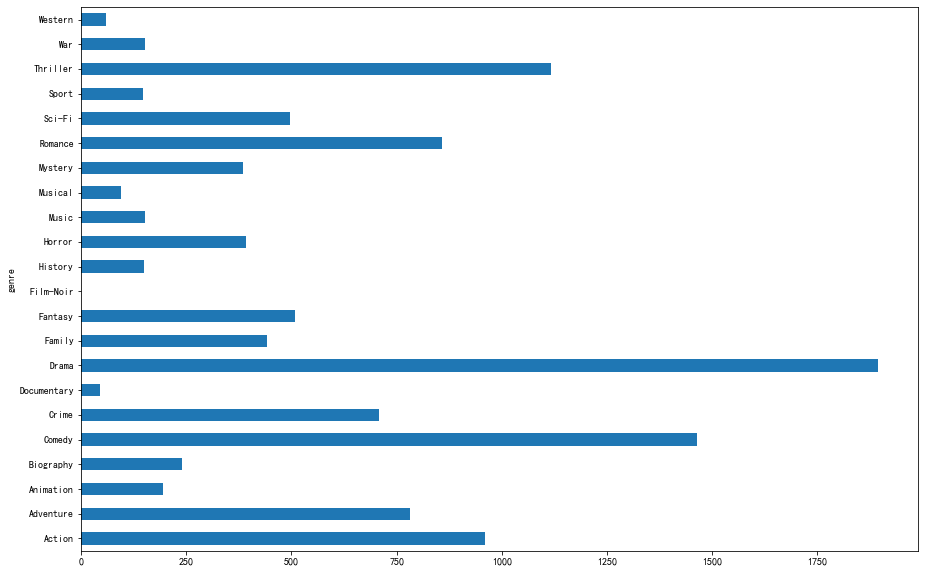

In [29]:
#按题材分类，统计个数
genre_count=genre_data.groupby('genre').size()
genre_count
plt.figure(figsize=(15.0,10.0))
genre_count.plot(kind='barh')#二维水平直方图
plt.savefig('genre_count.png')
plt.show()

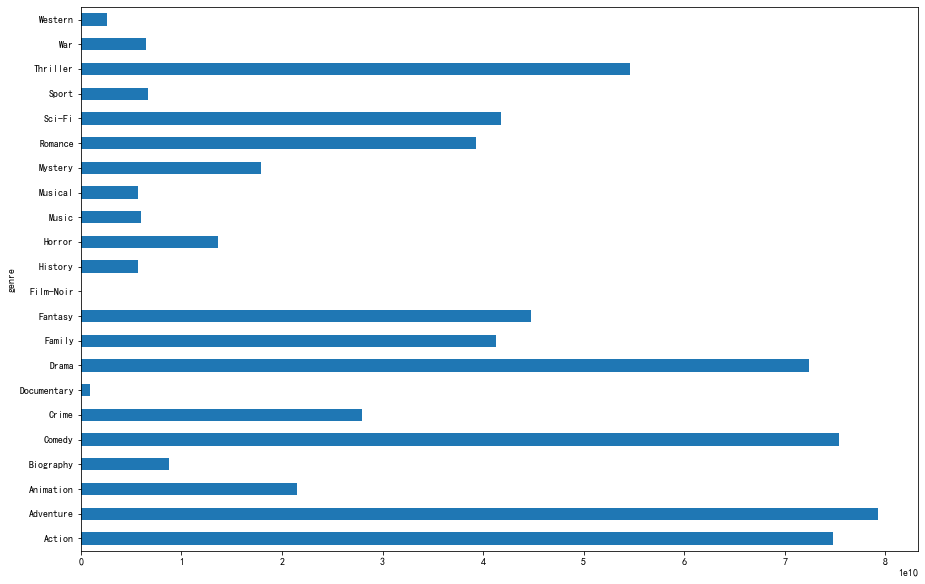

In [31]:
#按题材统计票房
genre_gross=genre_data.groupby('genre')['gross'].sum()
plt.figure(figsize=(15.0,10.0))
genre_gross.plot(kind='barh')
plt.savefig('genre_gross.png')
plt.show()

# 4.3盈利分析

In [33]:
#计算电影盈利字段
data['profit']=data.gross-data.budget
data

group_director_gross = data.groupby(by='director_name')['gross'].sum()/10000
group_director_gross.sort_values(ascending=False)

group_director_profit = data.groupby(by='director_name')['profit'].sum()/10000
group_director_profit.sort_values(ascending=False)

print(type(group_director_profit))
print(group_director_profit.values)
group_director_profit[group_director_profit.values>0]#盈利导演数量
group_director_profit[group_director_profit.values<0]#亏本导演数量                        


<class 'pandas.core.series.Series'>
[  167.6553  2854.6578 -1127.2676 ...  -423.1704  -999.6393   123.9558]


C:\Users\19152\AppData\Local\Temp/ipykernel_14664/1528971521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit']=data.gross-data.budget


director_name
Abel Ferrara          -1127.2676
Adam Goldberg          -164.7420
Adam Rapp              -339.8772
Adam Rifkin           -1080.6975
Agnieszka Holland     -1064.7214
                         ...    
Yimou Zhang          -28321.4142
Zach Cregger           -145.7225
Zak Penn               -136.3170
Zal Batmanglij         -423.1704
Álex de la Iglesia     -999.6393
Name: profit, Length: 782, dtype: float64

# 4.4电影评分及票房

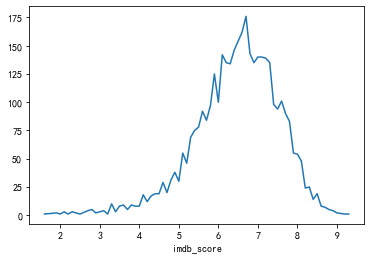

In [34]:
#查看各imdb评分的电影个数
imdb=data.groupby('imdb_score')['movie_title'].count()
plt.figure()
imdb.plot()
plt.savefig('imdb_score.png')
plt.show()


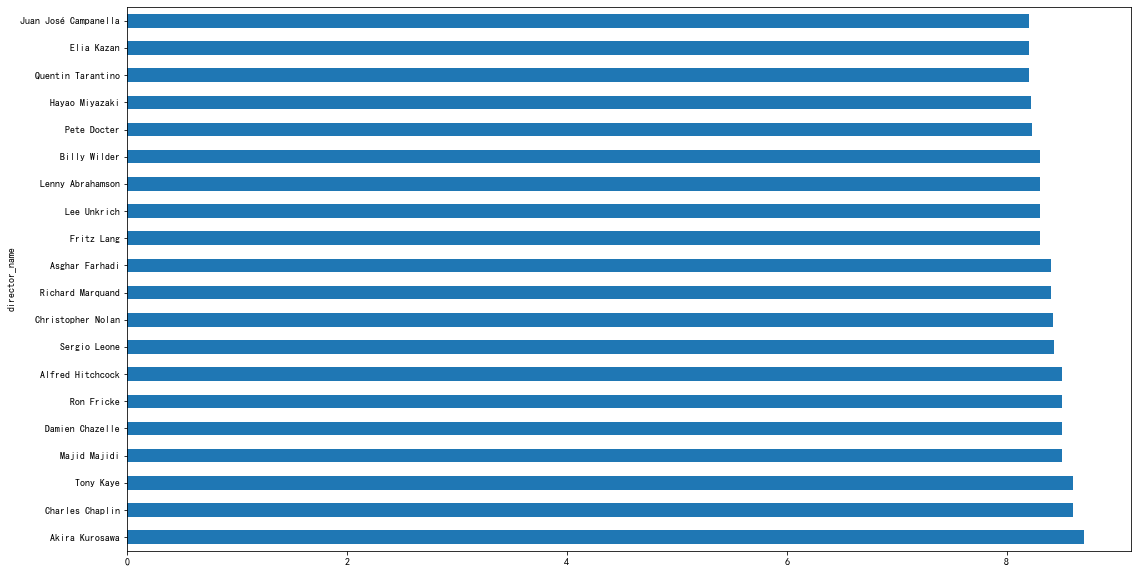

In [35]:
#查看imdb平均分最高的前20导演
director_mean = data.groupby('director_name')['imdb_score'].mean()

#使用sort排序
top20_imdb_directors = director_mean.sort_values(ascending=False)[:20]
plt.figure(figsize=(18.0,10.0))
top20_imdb_directors.plot(kind='barh')
plt.savefig('top20_imdb_director.png')
plt.show()

In [36]:
#导演的票房总收入
group_director=data.groupby(by='director_name')['gross'].sum()
group_director.sort_values(ascending=False)

director_name
Steven Spielberg       4.114233e+09
Peter Jackson          2.592969e+09
Michael Bay            2.231243e+09
Tim Burton             2.071275e+09
Sam Raimi              2.049549e+09
                           ...     
Paul Bunnell           2.436000e+03
Alex Craig Mann        1.332000e+03
Ricki Stern            1.111000e+03
Frank Whaley           7.030000e+02
Ekachai Uekrongtham    1.620000e+02
Name: gross, Length: 1660, dtype: float64

In [37]:
#主演的票房总收入
group_actor=data.groupby('actor_1_name')['gross'].sum()
group_actor.sort_values(ascending=False)

actor_1_name
Johnny Depp         3.714789e+09
Harrison Ford       3.391556e+09
Tom Hanks           3.264559e+09
Tom Cruise          2.987622e+09
J.K. Simmons        2.856407e+09
                        ...     
Jim Carter          3.607000e+03
Stephen McHattie    3.478000e+03
Tatyana Ali         2.468000e+03
Kate Maberly        2.436000e+03
Darryl Hunt         1.111000e+03
Name: gross, Length: 1431, dtype: float64

In [38]:
#导演和主演的票房收入
group_director_actor=data.groupby(by=['director_name','actor_1_name'])['gross'].sum()
group_director_actor.sort_values(ascending=False)

director_name          actor_1_name     
Joss Whedon            Chris Hemsworth      1.705551e+09
Sam Raimi              J.K. Simmons         1.485313e+09
Gore Verbinski         Johnny Depp          1.250323e+09
George Lucas           Natalie Portman      1.165483e+09
Tim Burton             Johnny Depp          1.070126e+09
                                                ...     
Alex Craig Mann        Justin Chon          1.332000e+03
Ricki Stern            Darryl Hunt          1.111000e+03
Brian Trenchard-Smith  David Keith          7.210000e+02
Frank Whaley           Lynn Cohen           7.030000e+02
Ekachai Uekrongtham    Michael Jai White    1.620000e+02
Name: gross, Length: 3419, dtype: float64